# Predicting Heart Disease using Machine Learning

![](../ml-projects/images/6-step-ml-framework.png)

In [1]:
# Import all the tools we need 
import expectexception

# Regular EDA (Exploratory Data Analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Setting the configuration
%matplotlib inline

SEED = 42

sns.set()
plt_params = {'axes.titlesize':'10',
              'xtick.labelsize':'8',
              'ytick.labelsize':'8',
              'axes.labelsize': '8',
              'legend.fontsize': '8'}
rcParams.update(plt_params)
# # To retunr to default
# plt.style.use('default')

## 1. Problem definition

> Giving clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

Source: 
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
https://archive.ics.uci.edu/ml/datasets/heart+disease

1. age: age in years.
2. sex: 
    - 1 = male; 
    - 0 = female.
3. cp: chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
    - 1 = true; 
    - 0 = false
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality 
    (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    - 1 = yes; 
    - 0 = no
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 
    - 0 = normal; 
    - 1 = fixed defect; 
    - 2 = reversable defect
14. target: the "target" field refers to the presence of heart disease in the patient
    - 0 = no disease;
    - 1 = disease

In [3]:
# Read the data
df = pd.read_csv('data/hear-disease-kaggle.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Get into the types and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1    526
0    499
Name: target, dtype: int64


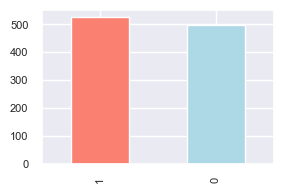

In [5]:
# Let's find out how many of each class there
print(df['target'].value_counts())
df.target.value_counts().plot.bar(figsize=(3,2), color=['salmon', 'lightblue']);

## 3. Evaluation

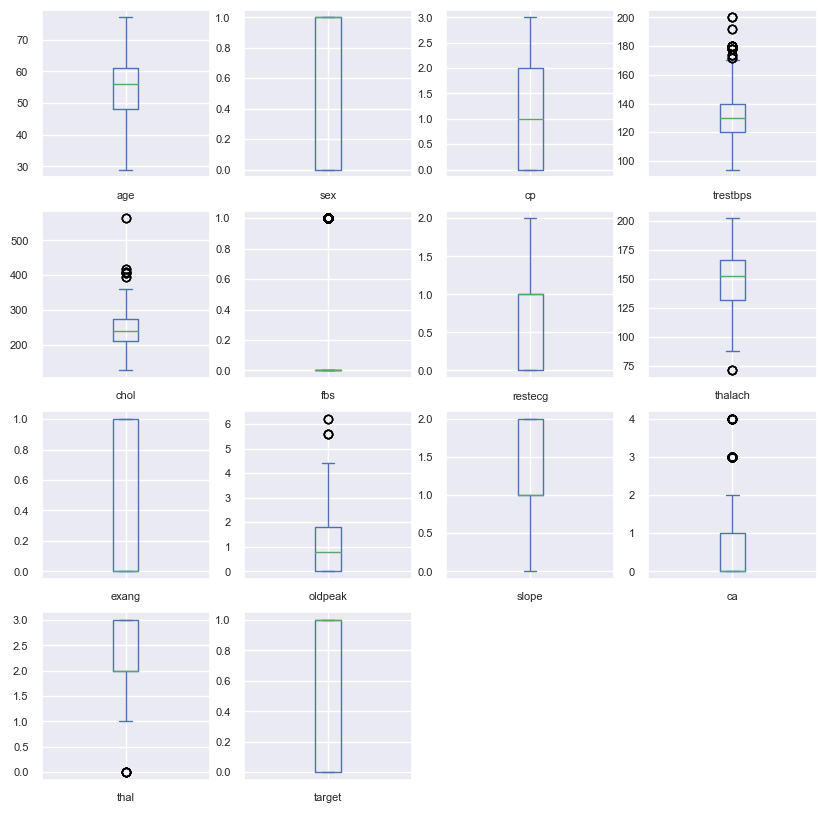

In [6]:
# Outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10));

In [7]:
# 2 types of features
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

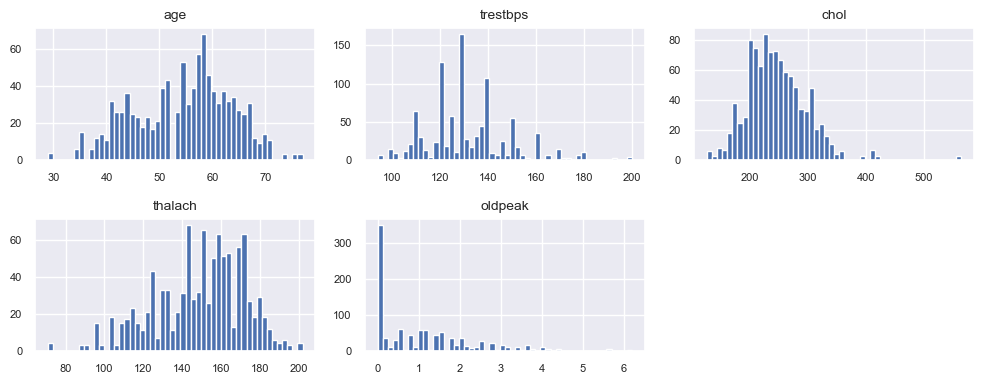

In [8]:
# Exploring the distribution of the numerical features
df[numerical].hist(bins=50, figsize=(10,4), layout=(2,3))
plt.tight_layout();

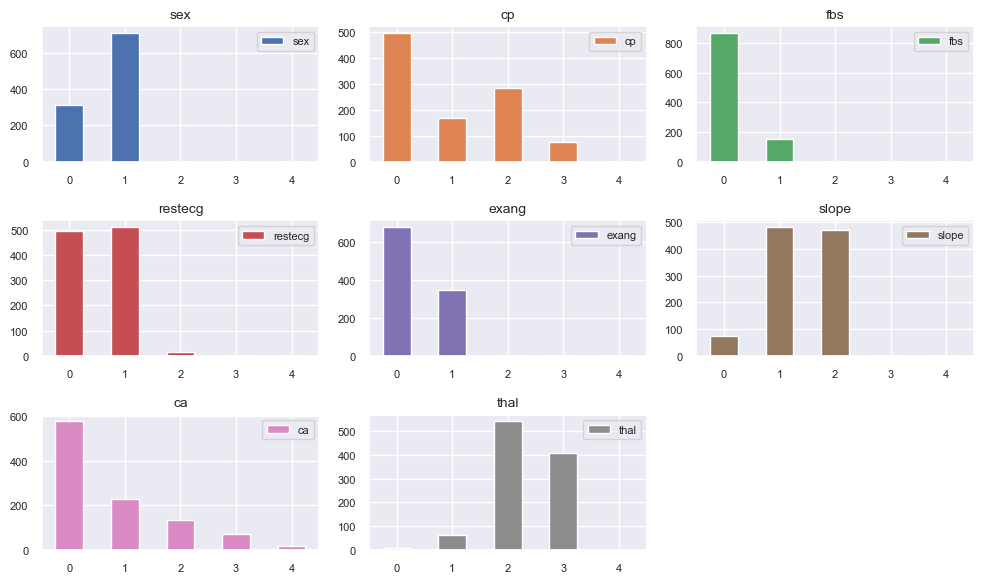

In [9]:
# Exploring the distribution of the categorical features
df[categorical].apply(pd.Series.value_counts).plot.bar(
    subplots=True, layout=(3,3), figsize=(10,6), sharex=False, rot=0);
plt.tight_layout();

## 4. Features

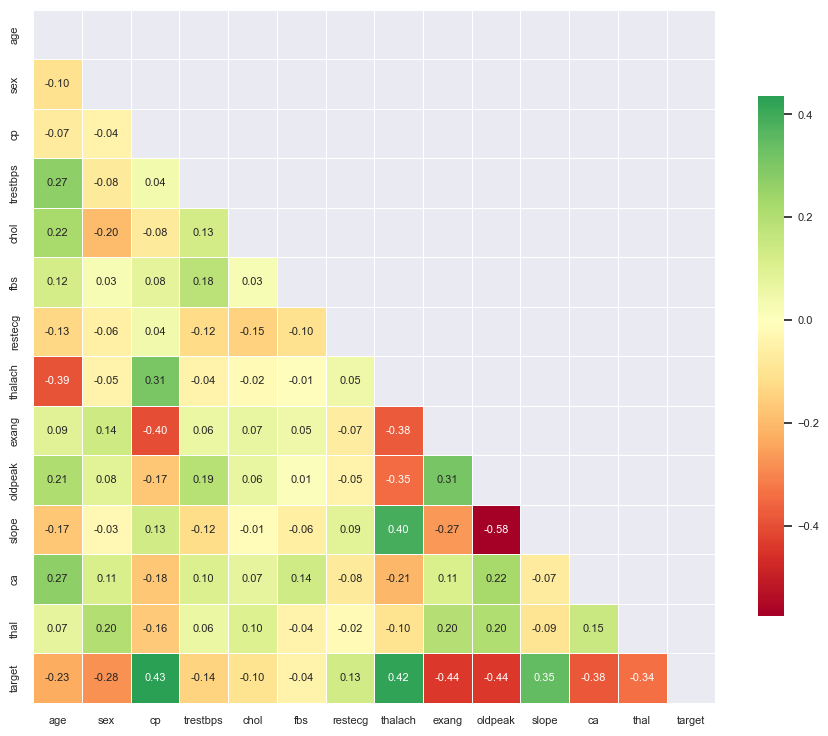

In [10]:
# Exploring the correlation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Let's make our correlation matrix more visual
fig, ax = plt.subplots(figsize=(11,9))
ax = sns.heatmap(corr, linewidths='.5', center=0, 
                 annot=True, fmt='.2f', annot_kws={'fontsize': 8},
                 mask=mask, cmap='RdYlGn', cbar_kws={"shrink": .75})

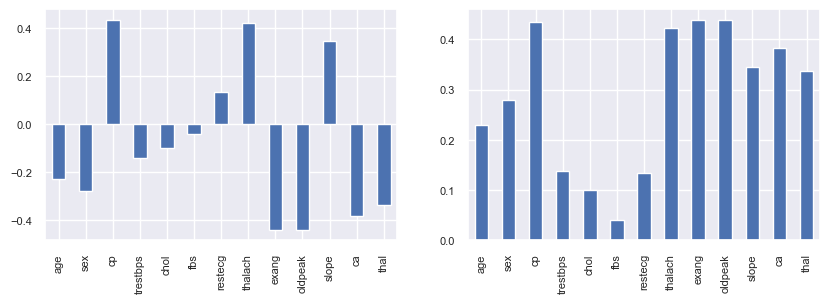

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
corr.target.iloc[:-1].plot.bar(ax=ax[0]);
corr.target.iloc[:-1].abs().plot.bar(ax=ax[1]);

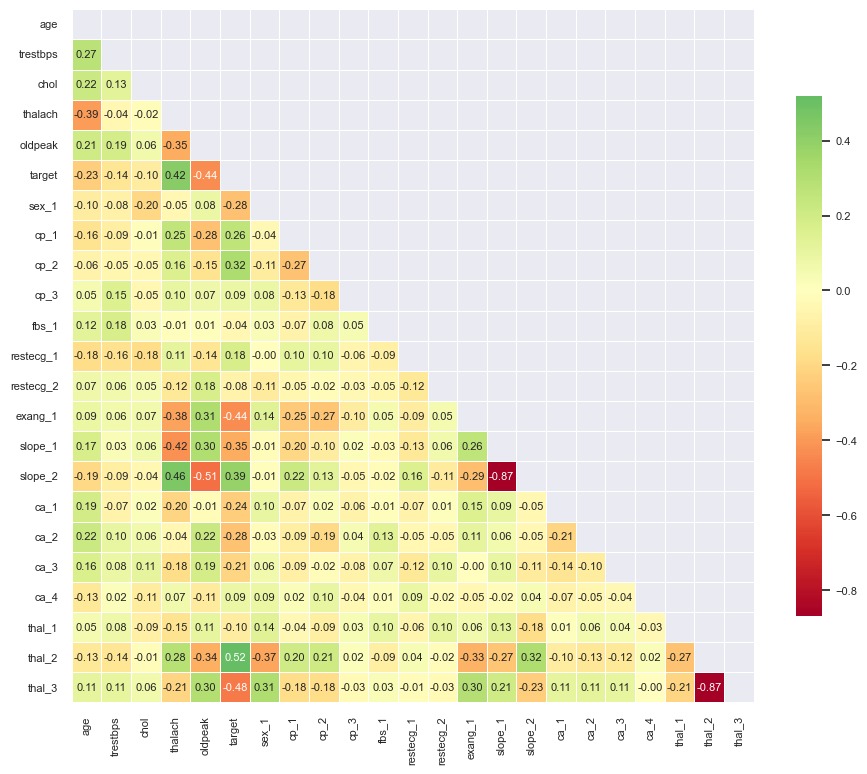

In [12]:
corr_d = pd.get_dummies(df, columns=categorical, drop_first=True).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_d, dtype=bool))

# Let's make our correlation matrix more visual
fig, ax = plt.subplots(figsize=(11,9))
ax = sns.heatmap(corr_d, linewidths='.5', center=0, 
                 annot=True, fmt='.2f', annot_kws={'fontsize': 8},
                 mask=mask, cmap='RdYlGn', cbar_kws={"shrink": .75})

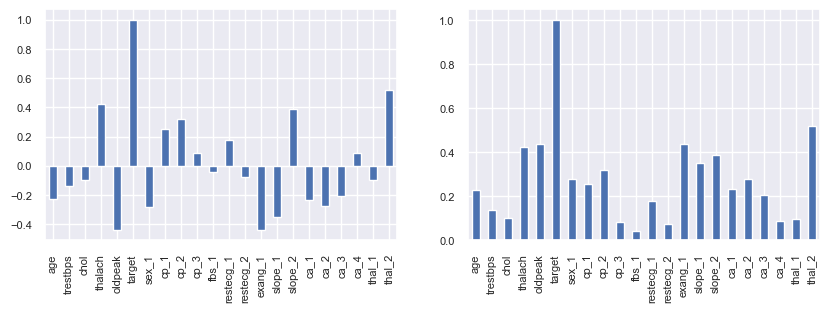

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
corr_d.target.iloc[:-1].plot.bar(ax=ax[0]);
corr_d.target.iloc[:-1].abs().plot.bar(ax=ax[1]);

## 5. Modelling

In [14]:
# Defining models to test
models = {'LogisticRegression': LogisticRegression(),
          'LinearSVC': LinearSVC(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'RadiusNeighborsClassifier': RadiusNeighborsClassifier(outlier_label='most_frequent'),
          'BaggingClassifier': BaggingClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
          'VotingClassifier': VotingClassifier(
              estimators=[('lr', LogisticRegression(multi_class='multinomial')), 
                          ('rf', RandomForestClassifier()), 
                          ('gnb', GaussianNB())], voting='soft'),
          'StackingClassifier': StackingClassifier(
              estimators=[('rf', RandomForestClassifier()),
                          ('svr', make_pipeline(MaxAbsScaler(), LinearSVC()))], 
              final_estimator=LogisticRegression())}

In [15]:
# Split data into X & y
X = df.drop(['target'], axis=1)
y = df.target

# Split into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [16]:
# Make a dictionary to keep model scores
model_fitted, model_scores = {}, {}
model_cv_accuracy = model_cv_roc_auc = model_cv_presicion = model_cv_recall = model_cv_f1 = {}

# Loop through models
for name, model_type in models.items():
    # Set random seed
    np.random.seed(SEED)
    print(f'{name}...')
    
    # Define different features and transformer pipeline
    transformer = ColumnTransformer(transformers=[
        ('categories', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), categorical),
        ('numbers', MinMaxScaler(), numerical)])

    # Create a preprocessing and modelling pipeline
    model = make_pipeline(transformer, model_type)
    
    # Fit the model to the data
    model.fit(X_train, y_train)
    model_fitted[name] = model
    
    # Evaluate the model and append its score to model_scores 
    model_scores[name] = model.score(X_test, y_test)
    model_cv_accuracy[name] = cross_val_score(model, X_test, y_test).mean()
    model_cv_roc_auc[name] = cross_val_score(model, X_test, y_test, scoring='roc_auc').mean()
    model_cv_presicion[name] = cross_val_score(model, X_test, y_test, scoring='precision').mean()
    model_cv_recall[name] = cross_val_score(model, X_test, y_test, scoring='recall').mean()
    model_cv_f1[name] = cross_val_score(model, X_test, y_test, scoring='f1').mean()

model_scores

LogisticRegression...
LinearSVC...
KNeighborsClassifier...
RadiusNeighborsClassifier...
BaggingClassifier...
RandomForestClassifier...
ExtraTreesClassifier...
AdaBoostClassifier...
GradientBoostingClassifier...
HistGradientBoostingClassifier...
VotingClassifier...
StackingClassifier...


{'LogisticRegression': 0.8390243902439024,
 'LinearSVC': 0.8195121951219512,
 'KNeighborsClassifier': 0.8536585365853658,
 'RadiusNeighborsClassifier': 0.9219512195121952,
 'BaggingClassifier': 0.975609756097561,
 'RandomForestClassifier': 0.9853658536585366,
 'ExtraTreesClassifier': 0.9853658536585366,
 'AdaBoostClassifier': 0.8585365853658536,
 'GradientBoostingClassifier': 0.9414634146341463,
 'HistGradientBoostingClassifier': 0.9853658536585366,
 'VotingClassifier': 0.8536585365853658,
 'StackingClassifier': 0.9853658536585366}

## 6. Experimenting

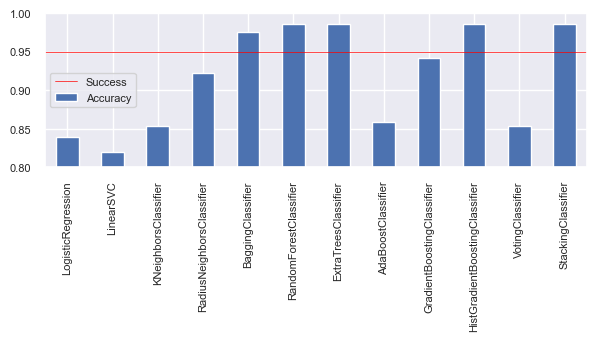

In [17]:
# Let's compare the models on accuracy score
pd.DataFrame(model_scores, index=['Accuracy']).T.plot.bar(figsize=(7,2))
plt.axhline(0.95, c='red', lw=0.5, label='Success')
plt.ylim(0.8, 1)
plt.legend();

In [18]:
best_model = model_fitted[max(model_scores, key=model_scores.get)]
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal']),
                                                 ('numbers', MinMaxScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('randomforestclassifier', RandomForestClassifier())])

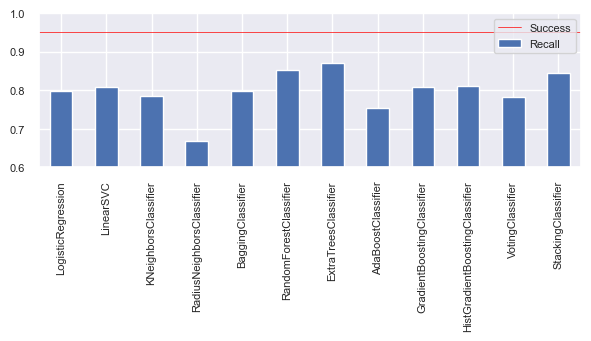

In [19]:
# Let's compare the models on Recall score
pd.DataFrame(model_cv_recall, index=['Recall']).T.plot.bar(figsize=(7,2))
plt.axhline(0.95, c='red', lw=0.5, label='Success')
plt.ylim(0.6, 1)
plt.legend();

In [20]:
best_model = model_fitted[max(model_cv_recall, key=model_cv_recall.get)]
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal']),
                                                 ('numbers', MinMaxScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('extratreesclassifier', ExtraTreesClassifier())])

,Score,Accuracy,ROC AUC,Presicion,Recall,F1
LogisticRegression,0.839024,0.797563,0.797563,0.797563,0.797563,0.797563
LinearSVC,0.819512,0.807981,0.807981,0.807981,0.807981,0.807981
KNeighborsClassifier,0.853659,0.783317,0.783317,0.783317,0.783317,0.783317
RadiusNeighborsClassifier,0.921951,0.667136,0.667136,0.667136,0.667136,0.667136
BaggingClassifier,0.975610,0.796672,0.796672,0.796672,0.796672,0.796672
RandomForestClassifier,0.985366,0.851938,0.851938,0.851938,0.851938,0.851938
ExtraTreesClassifier,0.985366,0.870401,0.870401,0.870401,0.870401,0.870401
AdaBoostClassifier,0.858537,0.752366,0.752366,0.752366,0.752366,0.752366
GradientBoostingClassifier,0.941463,0.807551,0.807551,0.807551,0.807551,0.807551
HistGradientBoostingClassifier,0.985366,0.810183,0.810183,0.810183,0.810183,0.810183


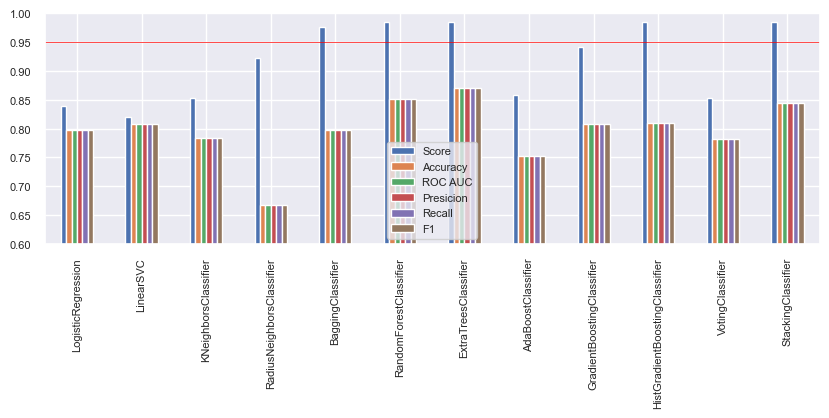

In [21]:
# Let's compare the models on Accuracy, ROC AUC, Precision, Recall, F1
compare_metrics = pd.DataFrame({
    "Score": model_scores,
    "Accuracy": model_cv_accuracy,
    "ROC AUC": model_cv_roc_auc,
    "Presicion": model_cv_presicion,
    "Recall": model_cv_recall,
    'F1': model_cv_f1
})
compare_metrics.plot.bar(figsize=(10,3)).legend(loc='lower center')
plt.axhline(0.95, c='red', lw=0.5)
plt.ylim(0.6, 1);
compare_metrics

**Tunning**

In [22]:
best_model.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('categories',
                                    OneHotEncoder(drop='if_binary',
                                                  handle_unknown='ignore'),
                                    ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                     'slope', 'ca', 'thal']),
                                   ('numbers', MinMaxScaler(),
                                    ['age', 'trestbps', 'chol', 'thalach',
                                     'oldpeak'])])),
  ('extratreesclassifier', ExtraTreesClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('categories',
                                  OneHotEncoder(drop='if_binary',
                                                handle_unknown='ignore'),
                                  ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                   'slope', 'ca', 'thal']),
          

In [23]:
# Setting the hyperparameters to tune
hyperparams = lr_grid = {
    'n_estimators': [64, 100, 128, 256],
    'criterion': ['entropy', 'log_loss', 'gini'],
    'max_features': [None,'sqrt'],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

# Set random seed
np.random.seed(SEED)
    
# Define different features and transformer pipeline
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

# Set the model
rsearch_model = RandomizedSearchCV(ExtraTreesClassifier(), hyperparams, scoring='recall',
                                     n_iter=20, verbose=1, error_score=True)
rsearch_model.fit(X_train_trans, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(error_score=True, estimator=ExtraTreesClassifier(),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'log_loss',
                                                      'gini'],
                                        'max_features': [None, 'sqrt'],
                                        'n_estimators': [64, 100, 128, 256],
                                        'warm_start': [True, False]},
                   scoring='recall', verbose=1)

In [24]:
y_preds = rsearch_model.predict(X_test_trans)

print('Accuracy: ', roc_auc_score(y_test, y_preds))
print('Recall  : ', recall_score(y_test, y_preds))
rsearch_model.best_params_

Accuracy:  0.9854368932038835
Recall  :  0.970873786407767


{'warm_start': True,
 'n_estimators': 64,
 'max_features': None,
 'criterion': 'gini',
 'bootstrap': False}

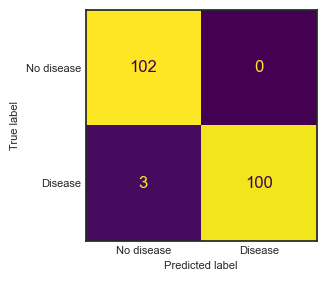

In [25]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(3,3))
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, colorbar=False,
                                        display_labels=['No disease', 'Disease'], ax=ax);

In [26]:
# Set the model
gsearch_model = GridSearchCV(ExtraTreesClassifier(), hyperparams, scoring='recall',
                             verbose=1, error_score=True)
gsearch_model.fit(X_train_trans, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(error_score=True, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [64, 100, 128, 256],
                         'warm_start': [True, False]},
             scoring='recall', verbose=1)

In [27]:
y_preds = gsearch_model.predict(X_test_trans)

print('Accuracy: ', roc_auc_score(y_test, y_preds))
print('Recall  : ', recall_score(y_test, y_preds))
gsearch_model.best_params_

Accuracy:  0.9854368932038835
Recall  :  0.970873786407767


{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'warm_start': False}

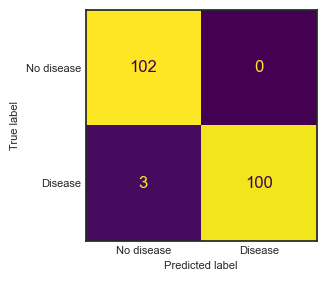

In [28]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(3,3))
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, colorbar=False,
                                        display_labels=['No disease', 'Disease'], ax=ax);

## 7. Final Model

In [29]:
# Set random seed
np.random.seed(SEED)

# Define different features and transformer pipeline
transformer = ColumnTransformer(transformers=[
    ('categories', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), categorical),
    ('numbers', MinMaxScaler(), numerical)])

# Create a preprocessing and modelling pipeline
final_model = make_pipeline(transformer, ExtraTreesClassifier(**gsearch_model.best_params_))

# Fit the model to the data
final_model.fit(X_train, y_train)

# Evaluate the model and append its score to model_scores 
y_preds = final_model.predict(X_test)

print('Accuracy: ', roc_auc_score(y_test, y_preds))
print('Recall  : ', recall_score(y_test, y_preds))
gsearch_model.best_params_

Accuracy:  0.9854368932038835
Recall  :  0.970873786407767


{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'warm_start': False}

**Save the final model**

In [30]:
from joblib import dump, load

# Save an existinting model to file
dump(final_model, filename='data/disease-prediction-best-model.joblib')

['data/disease-prediction-best-model.joblib']

**Loading the saved model (just for testing purposes)**

In [31]:
# Load a saved model
loaded_job_model = load(filename='data/disease-prediction-best-model.joblib')

# Make some predictions and evaluate the model
y_preds = loaded_job_model.predict(X_test)
print('Accuracy: ', roc_auc_score(y_test, y_preds))
print('Recall  : ', recall_score(y_test, y_preds))
gsearch_model.best_params_

Accuracy:  0.9854368932038835
Recall  :  0.970873786407767


{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'warm_start': False}